In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Data Preprocessing

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [92]:
df.drop(columns=["Unnamed: 32","id"],inplace=True)#removing unnecessary features

In [93]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [94]:
df.shape

(569, 31)

In [95]:
target=df[["diagnosis"]].values

In [96]:
x=df.iloc[:,1:].values

In [97]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x_std=ss.transform(x)

# Dimensionality Reduction

In [98]:
from sklearn.decomposition import PCA

In [99]:
pc=PCA(n_components=6)
pc.fit(x_std)
x_pca=pc.transform(x_std)

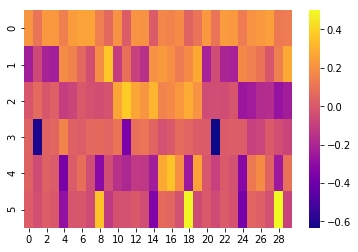

In [100]:
sns.heatmap(pc.components_,cmap='plasma')

# Prediction Models

In [101]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pca,target,random_state=2)

XGBOOST

In [102]:
from xgboost import XGBClassifier

In [103]:

xclf=XGBClassifier()
start=time.time()-1
xclf.fit(xtrain,ytrain)
stop=time.time()-1
xgb_time=abs(start-stop)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [104]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [105]:

xgb_score=accuracy_score(xclf.predict(xtest),ytest)



In [106]:
confusion_matrix(xclf.predict(xtest),ytest)

array([[83,  3],
       [ 4, 53]], dtype=int64)

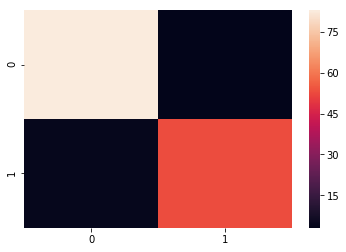

In [107]:
sns.heatmap(confusion_matrix(xclf.predict(xtest),ytest))

Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf=RandomForestClassifier(n_estimators=100,random_state=2)#as per the upcoming directives of RFC the default n_estimators will be 100
start=time.time()
rf.fit(xtrain,ytrain)
stop=time.time()
rf_time=abs(start-stop)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
rf_score=accuracy_score(rf.predict(xtest),ytest)

In [111]:
confusion_matrix(rf.predict(xtest),ytest)

array([[83,  4],
       [ 4, 52]], dtype=int64)

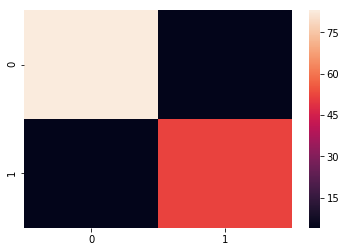

In [112]:
sns.heatmap(confusion_matrix(rf.predict(xtest),ytest))

 Gradient Boosting

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
gbc=GradientBoostingClassifier()

In [115]:
start=time.time()
gbc.fit(xtrain,ytrain)
stop=time.time()
gbc_time=abs(start-stop)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
gbc_score=accuracy_score(gbc.predict(xtest),ytest)

In [117]:
confusion_matrix(gbc.predict(xtest),ytest)

array([[81,  4],
       [ 6, 52]], dtype=int64)

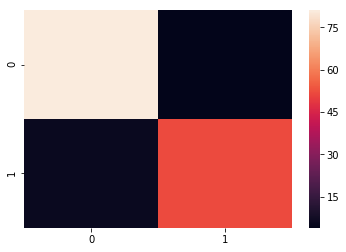

In [118]:
sns.heatmap(confusion_matrix(gbc.predict(xtest),ytest))

 ADABoosting

In [119]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [120]:
start=time.time()
ada.fit(xtrain,ytrain)
stop=time.time()
ada_time=abs(start-stop)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
ada_score=accuracy_score(ada.predict(xtest),ytest)

In [122]:
confusion_matrix(ada.predict(xtest),ytest)

array([[79,  6],
       [ 8, 50]], dtype=int64)

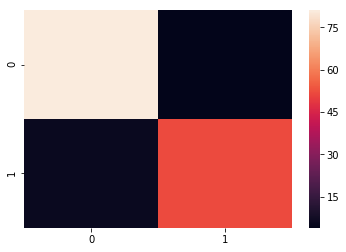

In [123]:
sns.heatmap(confusion_matrix(gbc.predict(xtest),ytest))

In [124]:
xgb_time

0.028945446014404297

In [125]:
rf_time

0.0967705249786377

In [126]:
ada_time

0.06881594657897949

In [127]:
gbc_time

0.05721688270568848

# Comparison Between Algorithms



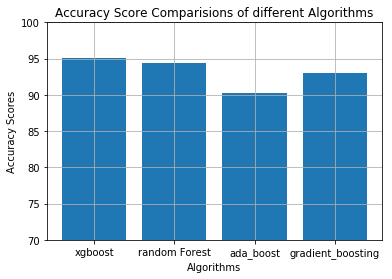

In [128]:
y_accuracy=[xgb_score*100,rf_score*100,ada_score*100,gbc_score*100]
x_accuracy=['xgboost','random Forest','ada_boost','gradient_boosting']
plt.ylim(bottom=70,top=100)
plt.grid()
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Scores")
plt.title("Accuracy Score Comparisions of different Algorithms")
plt.bar(x=x_accuracy,height=y_accuracy)
plt.savefig("Accuracy.png")

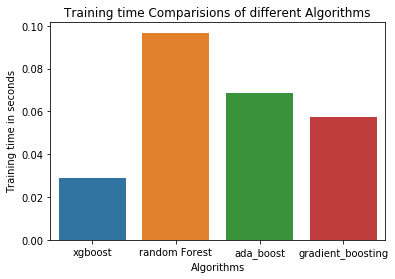

In [129]:
y_time=[xgb_time,rf_time,ada_time,gbc_time]
x_time=['xgboost','random Forest','ada_boost','gradient_boosting']
plt.xlabel("Algorithms")
plt.ylabel("Training time in seconds")
plt.title("Training time Comparisions of different Algorithms")
sns.barplot(x=x_time,y=y_time)
plt.savefig("time.png")

From the graphs above we can see that xgboost gives the best accuracy with default parameters and also takes very less time 